In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

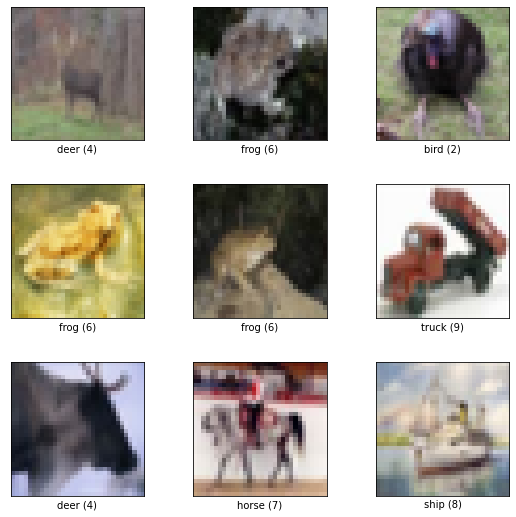

In [2]:
# Construct a tf.data.Dataset
ds, ds_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True, as_supervised=True)

if isinstance(ds, list):
    fig = tfds.show_examples(ds[0], ds_info)
else:
    fig = tfds.show_examples(ds, ds_info)


In [3]:
ds_size = None
train_ds = None
train_size = None
test_ds = None
test_size = None

if isinstance(ds, list):
    train_ds = ds[0]
    train_size = tf.data.experimental.cardinality(train_ds).numpy()
    test_ds = ds[1]
    test_size = tf.data.experimental.cardinality(test_ds).numpy()
    
    ds_size = train_size+test_size
    print("Data size:", ds_size)  
    print("Train size", train_size)
    print("Test size", test_size)
else:
    ds_size = tf.data.experimental.cardinality(ds).numpy()
    print("Data size:", ds_size)

    train_ds = ds.take(0.7 * ds_size)
    train_size = tf.data.experimental.cardinality(train_ds).numpy()
    print("Train size", train_size)

    test_ds = ds.skip(0.7*ds_size)
    test_size = tf.data.experimental.cardinality(test_ds).numpy()
    print("Test size", test_size)


Data size: 60000
Train size 50000
Test size 10000


In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 100
IMAGE_SIZE = 32
NUM_OF_CLASSES = 10

In [5]:
import math

def process_dataset(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
#     image = tf.image.per_image_standardization(image)
    
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize images from 32x32 to 227x227
#     image = tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))

    image = image/255.0
    
#     label = tf.one_hot(tf.cast(label, tf.int32), NUM_OF_CLASSES)
        
    return image, label

def construct_dataset(ds):
    ds = ds.shuffle(buffer_size=BATCH_SIZE)
    ds = ds.map(process_dataset,num_parallel_calls=AUTOTUNE)
    
#     ds=ds.repeat()
    ds = ds.batch(BATCH_SIZE, drop_remainder=False)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_data = construct_dataset(train_ds)
test_data = construct_dataset(test_ds)

steps_per_epoch=math.ceil(train_size/BATCH_SIZE)
validation_steps=math.ceil(test_size/BATCH_SIZE)



In [6]:
print(tf.data.experimental.cardinality(test_data).numpy())
print(steps_per_epoch)
print(validation_steps)

100
500
100


In [7]:
train_data

<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [8]:
for image, label in test_ds.take(1):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image/255.0
    
    print(image)
    print(label)
    label = tf.one_hot(tf.cast(label, tf.int32), NUM_OF_CLASSES)
#     print(image)
    print(label)

tf.Tensor(
[[[0.00276817 0.00286044 0.00290657]
  [0.00247597 0.00256824 0.00258362]
  [0.00215302 0.00224529 0.00218378]
  ...
  [0.00079969 0.00084583 0.00061515]
  [0.00078431 0.00084583 0.00061515]
  [0.00078431 0.00083045 0.00061515]]

 [[0.00264514 0.00273741 0.00270665]
  [0.00230681 0.00239908 0.00235294]
  [0.00181469 0.00192234 0.00181469]
  ...
  [0.00069204 0.0007228  0.0005075 ]
  [0.00066128 0.00069204 0.00047674]
  [0.00067666 0.00073818 0.00052288]]

 [[0.00247597 0.00258362 0.00246059]
  [0.00226067 0.0023837  0.00224529]
  [0.00184544 0.0019531  0.00181469]
  ...
  [0.00064591 0.00073818 0.0005075 ]
  [0.00066128 0.00076894 0.00052288]
  [0.00070742 0.00086121 0.00059977]]

 ...

 [[0.0038293  0.0038293  0.0038293 ]
  [0.00389081 0.00389081 0.00389081]
  [0.00387543 0.00387543 0.00387543]
  ...
  [0.00390619 0.00390619 0.00390619]
  [0.00392157 0.00392157 0.00392157]
  [0.00386005 0.00386005 0.00386005]]

 [[0.0038293  0.0038293  0.0038293 ]
  [0.00389081 0.00389081 0

In [9]:
for image, label in test_data.take(1):
    print(image.shape)
    print(image)
    print(label)

print(tf.data.experimental.cardinality(test_data).numpy())
    

(100, 32, 32, 3)
tf.Tensor(
[[[[1.21491740e-03 1.09188783e-03 9.68858192e-04]
   [1.38408307e-03 1.26105349e-03 1.13802392e-03]
   [1.55324885e-03 1.44559785e-03 1.32256828e-03]
   ...
   [1.43021916e-03 1.38408307e-03 1.32256828e-03]
   [1.44559785e-03 1.43021916e-03 1.36870437e-03]
   [1.41484046e-03 1.39946176e-03 1.33794697e-03]]

  [[1.27643219e-03 1.15340261e-03 1.01499434e-03]
   [1.35332567e-03 1.21491740e-03 1.07650913e-03]
   [1.41484046e-03 1.29181088e-03 1.15340261e-03]
   ...
   [1.39946176e-03 1.36870437e-03 1.30718958e-03]
   [1.46097655e-03 1.43021916e-03 1.36870437e-03]
   [1.41484046e-03 1.39946176e-03 1.33794697e-03]]

  [[1.29181088e-03 1.13802392e-03 9.99615644e-04]
   [1.33794697e-03 1.19953870e-03 1.04575173e-03]
   [1.32256828e-03 1.15340261e-03 1.01499434e-03]
   ...
   [1.39946176e-03 1.35332567e-03 1.27643219e-03]
   [1.35332567e-03 1.33794697e-03 1.27643219e-03]
   [1.33794697e-03 1.32256828e-03 1.26105349e-03]]

  ...

  [[2.75278743e-03 2.79892352e-03 2.81

In [10]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import RMSprop, Adam

classifier = Sequential([
#     experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    Conv2D(64, (3, 3), strides=(2, 2),activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),Dropout(0.5),
    Dense(units = 256, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 64, activation = 'relu'),Dropout(0.1),
    Dense(units = NUM_OF_CLASSES, activation = 'softmax')
])



# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)



hist = classifier.fit(train_data,  epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], 
                   validation_data=test_data)



Epoch 1/1000
500/500 [==============================] - 20s 39ms/step - loss: 2.1328 - accuracy: 0.3207 - val_loss: 2.2464 - val_accuracy: 0.2370
Epoch 2/1000
500/500 [==============================] - 21s 42ms/step - loss: 2.0772 - accuracy: 0.3771 - val_loss: 2.3612 - val_accuracy: 0.1000
Epoch 3/1000
500/500 [==============================] - 23s 46ms/step - loss: 2.0462 - accuracy: 0.4092 - val_loss: 2.3560 - val_accuracy: 0.1047
Epoch 4/1000
500/500 [==============================] - 25s 49ms/step - loss: 2.0298 - accuracy: 0.4249 - val_loss: 2.3607 - val_accuracy: 0.1004
Epoch 5/1000
500/500 [==============================] - 22s 44ms/step - loss: 2.0188 - accuracy: 0.4368 - val_loss: 2.2703 - val_accuracy: 0.1872
Epoch 6/1000
500/500 [==============================] - 24s 49ms/step - loss: 2.0074 - accuracy: 0.4485 - val_loss: 2.3460 - val_accuracy: 0.1146
Epoch 7/1000
500/500 [==============================] - 24s 49ms/step - loss: 2.0014 - accuracy: 0.4534 - val_loss: 2.3608 -

500/500 [==============================] - 42s 83ms/step - loss: 1.8931 - accuracy: 0.5657 - val_loss: 2.2013 - val_accuracy: 0.2573
Epoch 53/1000
500/500 [==============================] - 41s 81ms/step - loss: 1.8915 - accuracy: 0.5660 - val_loss: 2.0136 - val_accuracy: 0.4420
Epoch 54/1000
500/500 [==============================] - 41s 83ms/step - loss: 1.8940 - accuracy: 0.5642 - val_loss: 2.1258 - val_accuracy: 0.3296
Epoch 55/1000
500/500 [==============================] - 41s 82ms/step - loss: 1.8928 - accuracy: 0.5658 - val_loss: 1.9840 - val_accuracy: 0.4723
Epoch 56/1000
500/500 [==============================] - 44s 88ms/step - loss: 1.8908 - accuracy: 0.5682 - val_loss: 2.1206 - val_accuracy: 0.3382
Epoch 57/1000
500/500 [==============================] - 41s 82ms/step - loss: 1.8922 - accuracy: 0.5658 - val_loss: 2.0411 - val_accuracy: 0.4138
Epoch 58/1000
500/500 [==============================] - ETA: 0s - loss: 1.8907 - accuracy: 0.5682
Epoch 00058: ReduceLROnPlateau re